<a href="https://colab.research.google.com/github/Praveena-08/churnprediction_ml/blob/main/Churnmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [ ]:
df = pd.read_csv("/content/Churn_Modelling.csv")
print(df.head())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [ ]:
print(df.columns)


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [ ]:
numerical_features_list = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
for col in df.columns:
    if col not in numerical_features_list:
        print(col, df[col].unique())
        print("-"*50)
print("\nMissing values per column:")
print(df.isnull().sum())


RowNumber [    1     2     3 ...  9998  9999 10000]
--------------------------------------------------
CustomerId [15634602 15647311 15619304 ... 15584532 15682355 15628319]
--------------------------------------------------
Surname ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
--------------------------------------------------
Geography ['France' 'Spain' 'Germany']
--------------------------------------------------
Gender ['Female' 'Male']
--------------------------------------------------
HasCrCard [1 0]
--------------------------------------------------
IsActiveMember [1 0]
--------------------------------------------------
Exited [1 0]
--------------------------------------------------

Missing values per column:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Es

In [ ]:
print(df.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

In [ ]:
# Check missing values
print(df.isnull().sum())
df = df.dropna()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
#  columns like 'Gender', 'Geography'
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

#  use get_dummies
df = pd.get_dummies(df, drop_first=True)

print(df.head())


   RowNumber  CustomerId  CreditScore  Gender  Age  Tenure    Balance  \
0          1    15634602          619       0   42       2       0.00   
1          2    15647311          608       0   41       1   83807.86   
2          3    15619304          502       0   42       8  159660.80   
3          4    15701354          699       0   39       1       0.00   
4          5    15737888          850       0   43       2  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  ...  Surname_Zotov  \
0              1          1               1  ...          False   
1              1          0               1  ...          False   
2              3          1               0  ...          False   
3              2          0               0  ...          False   
4              1          1               1  ...          False   

   Surname_Zotova  Surname_Zox  Surname_Zubarev  Surname_Zubareva  \
0           False        False            False             False   
1           False   

In [ ]:
# Example: Assuming 'Churn' is the target column
X = df.drop('Exited', axis=1)
y = df['Exited']


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("Before SMOTE:", y.value_counts())
print("After SMOTE:", pd.Series(y_resampled).value_counts())


Before SMOTE: Exited
0    7963
1    2037
Name: count, dtype: int64
After SMOTE: Exited
1    7963
0    7963
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (12740, 2944)
Test shape: (3186, 2944)


In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.891713747645951
[[1484  149]
 [ 196 1357]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1633
           1       0.90      0.87      0.89      1553

    accuracy                           0.89      3186
   macro avg       0.89      0.89      0.89      3186
weighted avg       0.89      0.89      0.89      3186



In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9183929692404269
[[1595   38]
 [ 222 1331]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.92      1633
           1       0.97      0.86      0.91      1553

    accuracy                           0.92      3186
   macro avg       0.93      0.92      0.92      3186
weighted avg       0.92      0.92      0.92      3186



In [ ]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9118016321406152
[[1555   78]
 [ 203 1350]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1633
           1       0.95      0.87      0.91      1553

    accuracy                           0.91      3186
   macro avg       0.91      0.91      0.91      3186
weighted avg       0.91      0.91      0.91      3186



In [ ]:
print(df["Gender"].unique())

[0 1]


In [ ]:
# printing the unique values in all the columns

numerical_features_list = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())
    print("-"*50)

Streaming output truncated to the last 5000 lines.
Surname_Cecil [False  True]
--------------------------------------------------
Surname_Celis [False  True]
--------------------------------------------------
Surname_Ch'ang [False  True]
--------------------------------------------------
Surname_Ch'en [False  True]
--------------------------------------------------
Surname_Ch'eng [False  True]
--------------------------------------------------
Surname_Ch'ien [False  True]
--------------------------------------------------
Surname_Ch'in [False  True]
--------------------------------------------------
Surname_Ch'iu [False  True]
--------------------------------------------------
Surname_Chadwick [False  True]
--------------------------------------------------
Surname_Challis [False  True]
--------------------------------------------------
Surname_Chalmers [False  True]
--------------------------------------------------
Surname_Chamberlain [False  True]
-----------------------------------

In [ ]:
print(df.isnull().sum())

RowNumber            0
CustomerId           0
CreditScore          0
Gender               0
Age                  0
                    ..
Surname_Zuev         0
Surname_Zuyev        0
Surname_Zuyeva       0
Geography_Germany    0
Geography_Spain      0
Length: 2945, dtype: int64


In [ ]:
df.shape

(10000, 2945)

In [ ]:
df.head(2)

,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,Surname_Zotov,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain
0,1,15634602,619,0,42,2,0.00,1,1,1,...,False,False,False,False,False,False,False,False,False,False
1,2,15647311,608,0,41,1,83807.86,1,0,1,...,False,False,False,False,False,False,False,False,False,True


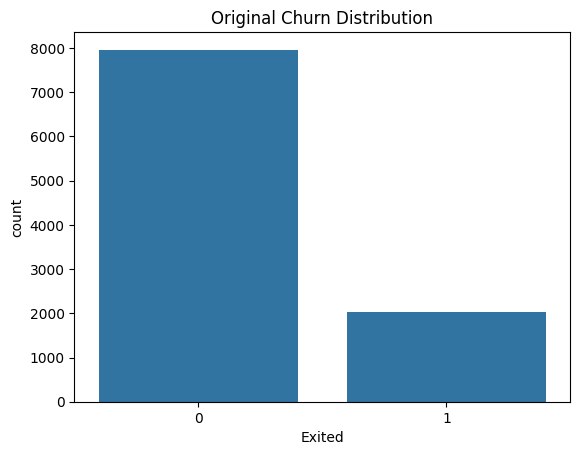

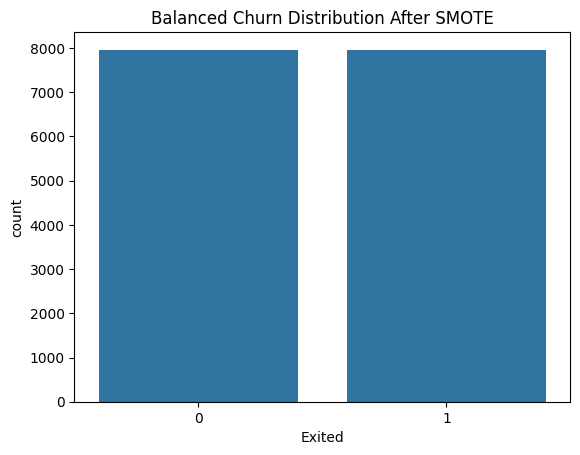

In [ ]:
# Before SMOTE
sns.countplot(x=y)
plt.title('Original Churn Distribution')
plt.show()

# After SMOTE
sns.countplot(x=y_resampled)
plt.title('Balanced Churn Distribution After SMOTE')
plt.show()


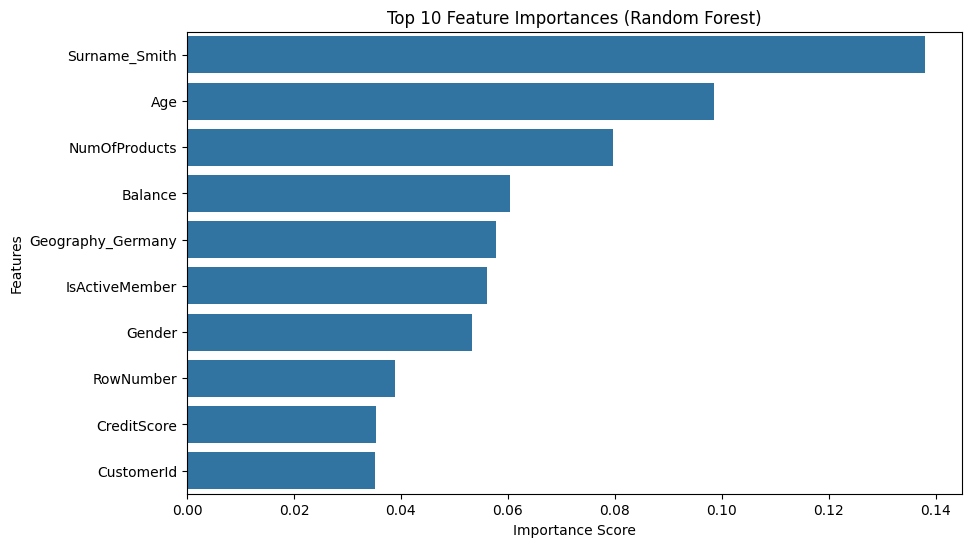

In [ ]:
importances = rf.feature_importances_
features = X.columns

# Put in a DataFrame for easy sorting
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10])
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


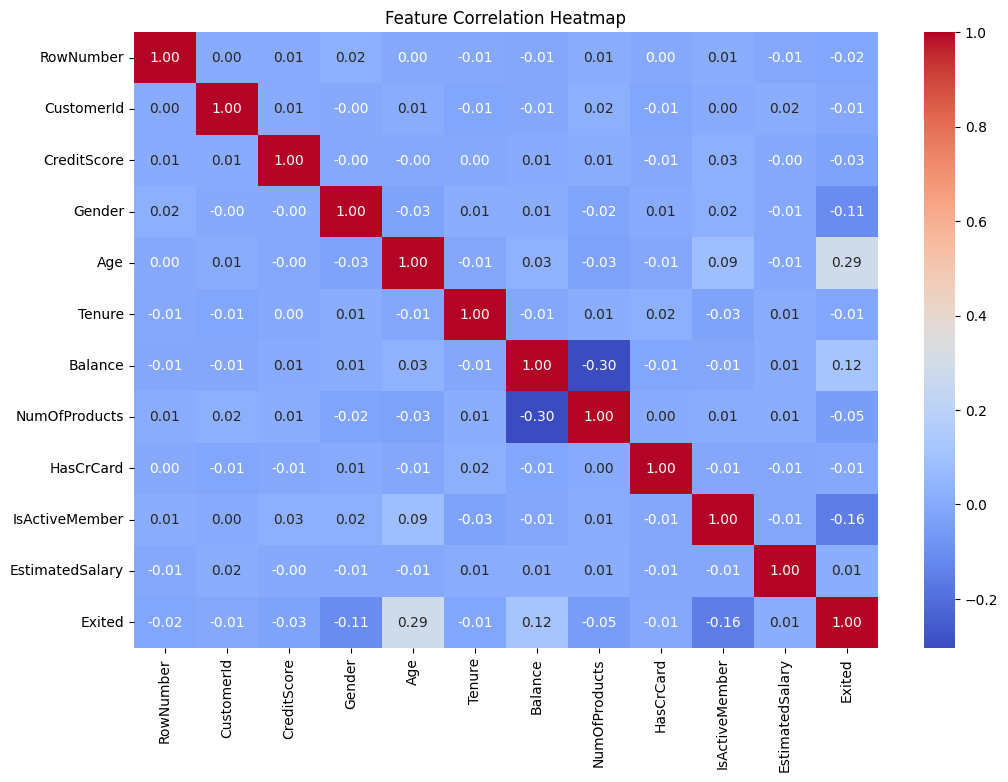

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Feature Correlation Heatmap')
plt.show()


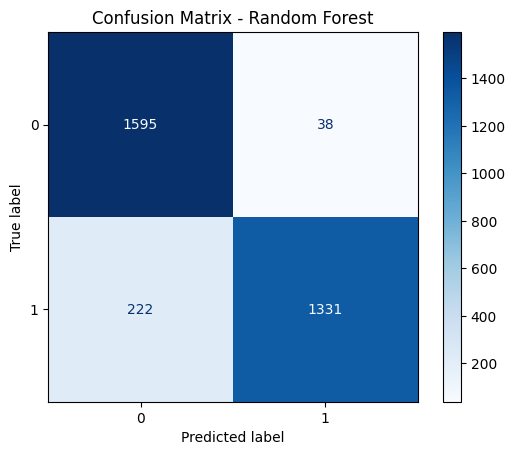

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Confusion Matrix for Random Forest predictions
cm = confusion_matrix(y_test, y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title('Confusion Matrix - Random Forest')
plt.show()


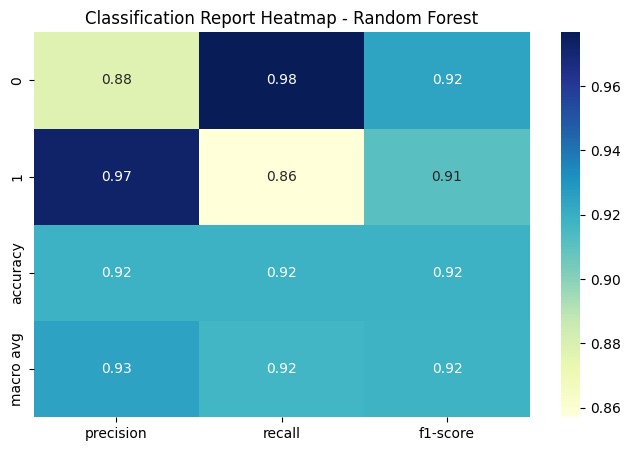

In [ ]:


report = classification_report(y_test, y_pred_rf, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8,5))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu")
plt.title('Classification Report Heatmap - Random Forest')
plt.show()


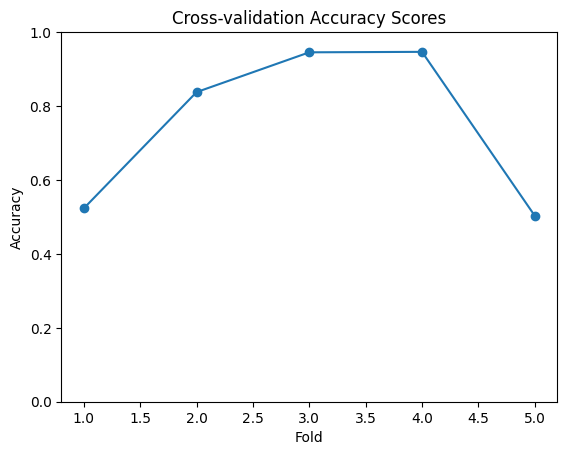

Mean CV Accuracy: 0.7512387298827977


In [ ]:
scores = cross_val_score(rf, X_resampled, y_resampled, cv=5)

plt.plot(range(1, 6), scores, marker='o')
plt.title('Cross-validation Accuracy Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

print("Mean CV Accuracy:", scores.mean())


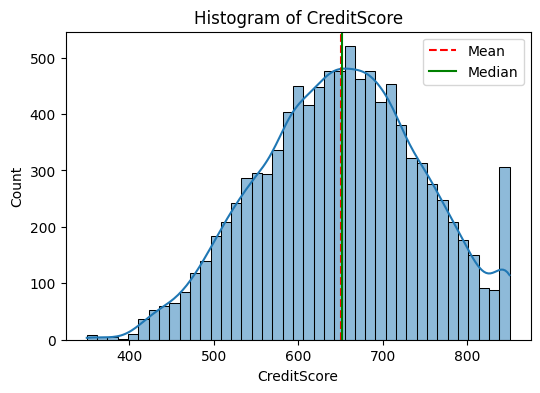

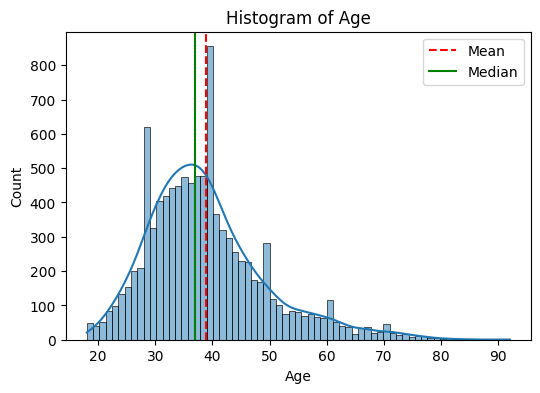

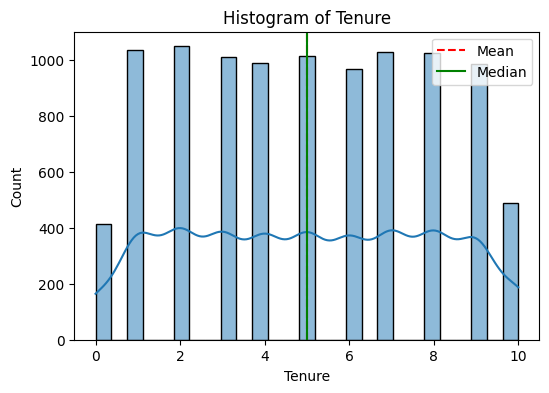

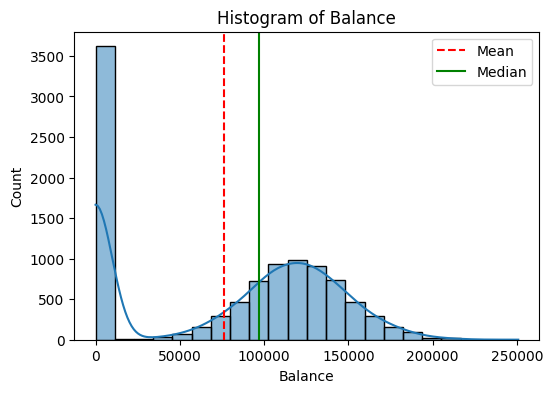

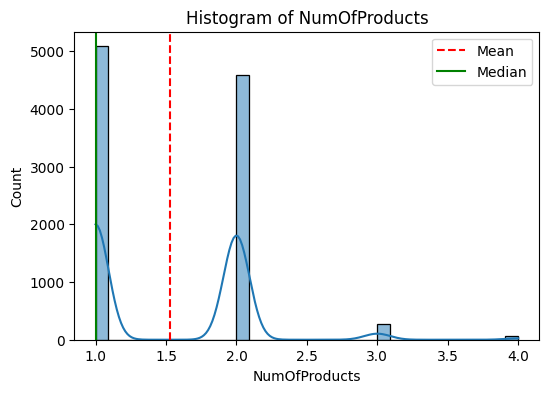

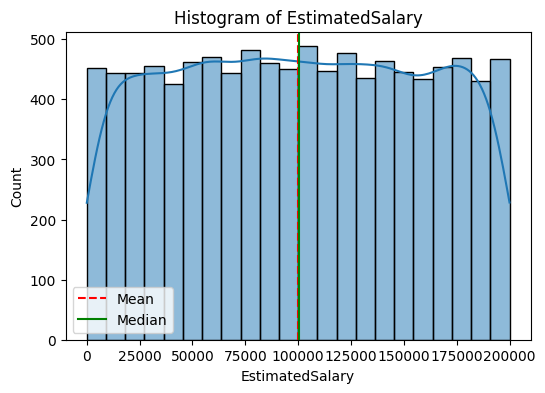

In [ ]:
def plot_histogram(df, column_name):
    plt.figure(figsize=(6,4))
    sns.histplot(df[column_name], kde=True)
    plt.axvline(df[column_name].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(df[column_name].median(), color='green', linestyle='-', label='Median')
    plt.title(f"Histogram of {column_name}")
    plt.legend()
    plt.show()
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for col in numeric_cols:
    plot_histogram(df, col)

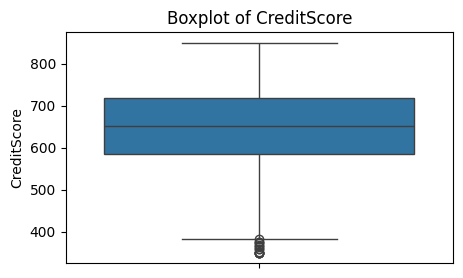

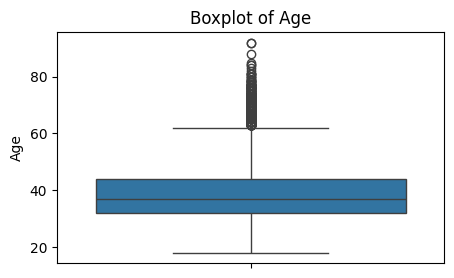

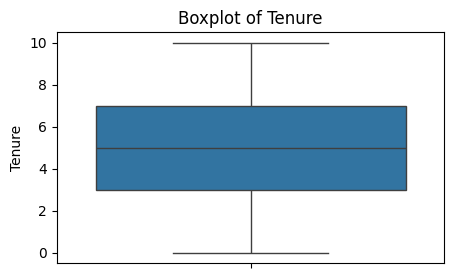

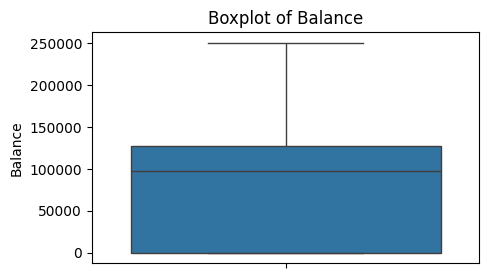

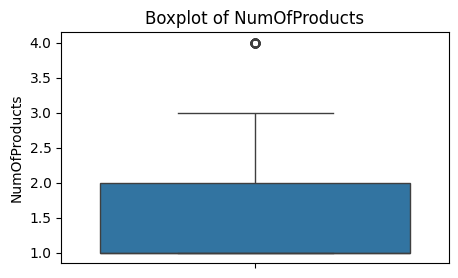

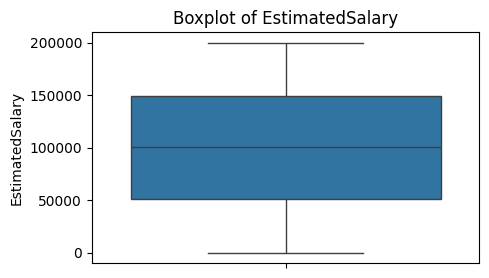

In [ ]:
def plot_boxplot(df, column_name):
    plt.figure(figsize=(5,3))
    sns.boxplot(y=df[column_name])
    plt.title(f"Boxplot of {column_name}")
    plt.show()
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for col in numeric_cols:
     plot_boxplot(df, col)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

print("Before downsampling:", y.value_counts())
print("After downsampling:", pd.Series(y_resampled).value_counts())


Before downsampling: Exited
0    7963
1    2037
Name: count, dtype: int64
After downsampling: Exited
0    2037
1    2037
Name: count, dtype: int64


In [ ]:
df = pd.read_csv("Churn_Modelling.csv")
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

X = df.drop('Exited', axis=1)
y = df['Exited']


In [ ]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

print("Before downsampling:", y.value_counts())
print("After downsampling:", pd.Series(y_resampled).value_counts())


Before downsampling: Exited
0    7963
1    2037
Name: count, dtype: int64
After downsampling: Exited
0    2037
1    2037
Name: count, dtype: int64


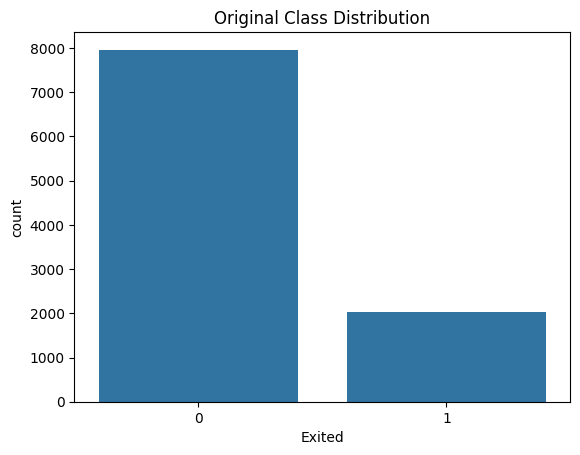

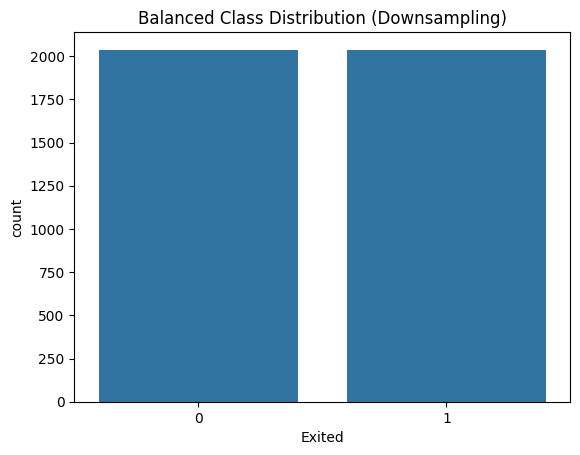

In [ ]:
# Before
sns.countplot(x=y)
plt.title("Original Class Distribution")
plt.show()

# After
sns.countplot(x=y_resampled)
plt.title("Balanced Class Distribution (Downsampling)")
plt.show()


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,  # standard
    max_depth=8,       # reasonable tree depth
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.8537350910232266
[[1456  177]
 [ 289 1264]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1633
           1       0.88      0.81      0.84      1553

    accuracy                           0.85      3186
   macro avg       0.86      0.85      0.85      3186
weighted avg       0.86      0.85      0.85      3186



In [ ]:
# If random search failed — just run default RF instead:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1633
           1       0.90      0.82      0.86      1553

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186

